In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns

In [2]:
noreuse = pd.read_csv('outputs/noreuse-stdlib-compile-profile.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('outputs/reuse-stdlib-compile-profile.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147906560
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,2607
3,Lean/Runtime.lean,reuse_across_ctor_disabled,rss,70516736
4,Lean/Runtime.lean,reuse_across_ctor_disabled,c_file_size,2787
...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,371
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,307150848
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144273408
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,3025
3,Lean/Runtime.lean,reuse_across_ctor_disabled,rss,68943872
4,Lean/Runtime.lean,reuse_across_ctor_disabled,c_file_size,2787
...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,361
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,304402432
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


In [3]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [4]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144273408,reuse_across_ctor_disabled,147906560
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579,reuse_across_ctor_disabled,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,3025,reuse_across_ctor_disabled,2607
3,Lean/Runtime.lean,reuse_across_ctor_disabled,rss,68943872,reuse_across_ctor_disabled,70516736
4,Lean/Runtime.lean,reuse_across_ctor_disabled,c_file_size,2787,reuse_across_ctor_disabled,2787
...,...,...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143,reuse_across_ctor_disabled,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,361,reuse_across_ctor_disabled,371
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,304402432,reuse_across_ctor_disabled,307150848
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lake/Version.lean,227,938,711,75.799574
1,Lean/Linter/Util.lean,355,502,147,29.282869
2,Lean/Compiler/IR.lean,533,733,200,27.285130
3,Lean/Util.lean,372,504,132,26.190476
4,Lean/Elab/Tactic/Conv.lean,417,534,117,21.910112
...,...,...,...,...,...
845,Lean/Meta/TransparencyMode.lean,378,151,-227,-150.331126
846,Init/Data/Option.lean,421,168,-253,-150.595238
847,Init/Data/ByteArray.lean,320,127,-193,-151.968504
848,Init/Data/UInt/Log2.lean,402,152,-250,-164.473684


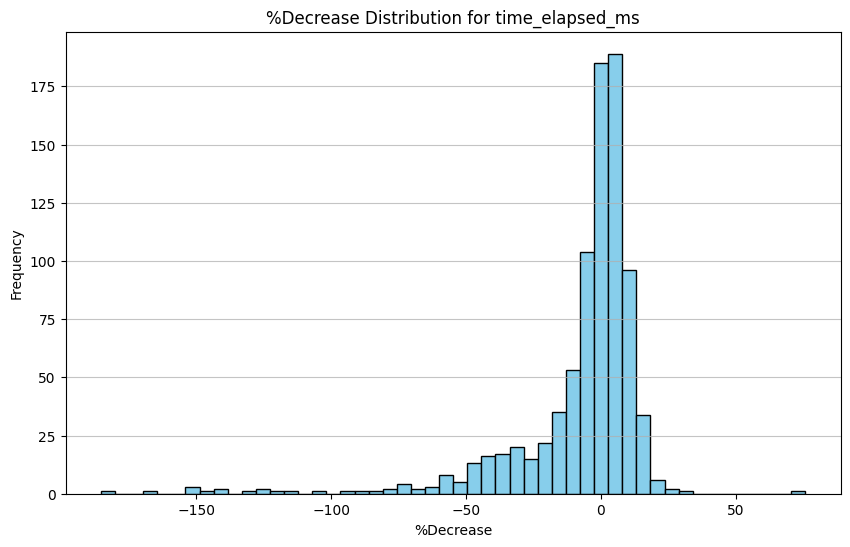

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/List/Control.lean,98086912,102805504,4718592,4.589824
1,Init/Data/Sum.lean,81350656,85155840,3805184,4.468494
2,Init/Data/Nat/Log2.lean,109875200,114720768,4845568,4.223793
3,Init/Data/Char/Basic.lean,86253568,90050560,3796992,4.216511
4,Init/Data/Option/Instances.lean,87306240,91107328,3801088,4.172099
...,...,...,...,...,...
845,Lean/Elab/PreDefinition/WF.lean,332713984,334422016,1708032,0.510741
846,Lean/Elab.lean,428212224,430182400,1970176,0.457986
847,Lean.lean,498446336,500015104,1568768,0.313744
848,Lean/Server/Rpc.lean,262332416,263114752,782336,0.297336


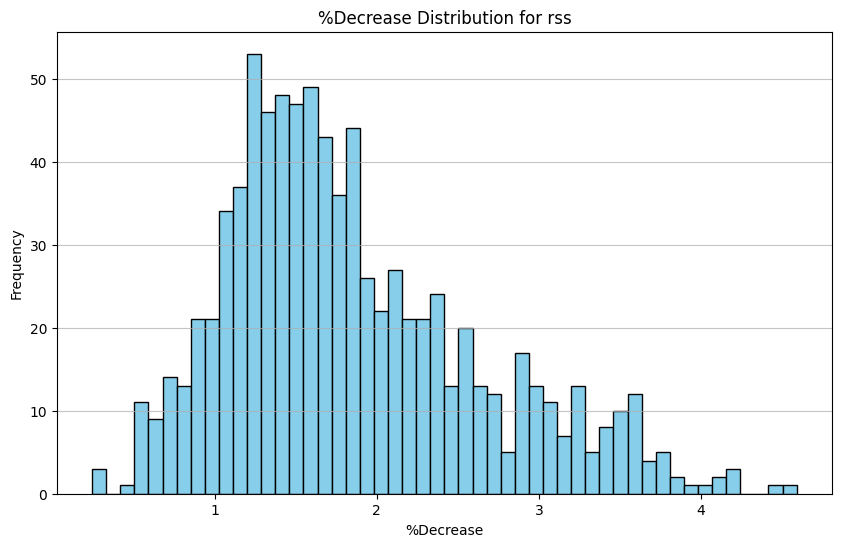

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,711,75.799574
1,NaN,NaN,NaN,147,29.282869
2,NaN,NaN,NaN,200,27.285130
3,NaN,NaN,NaN,132,26.190476
4,NaN,NaN,NaN,117,21.910112
...,...,...,...,...,...
2545,NaN,NaN,NaN,-227,-150.331126
2546,NaN,NaN,NaN,-253,-150.595238
2547,NaN,NaN,NaN,-193,-151.968504
2548,NaN,NaN,NaN,-250,-164.473684


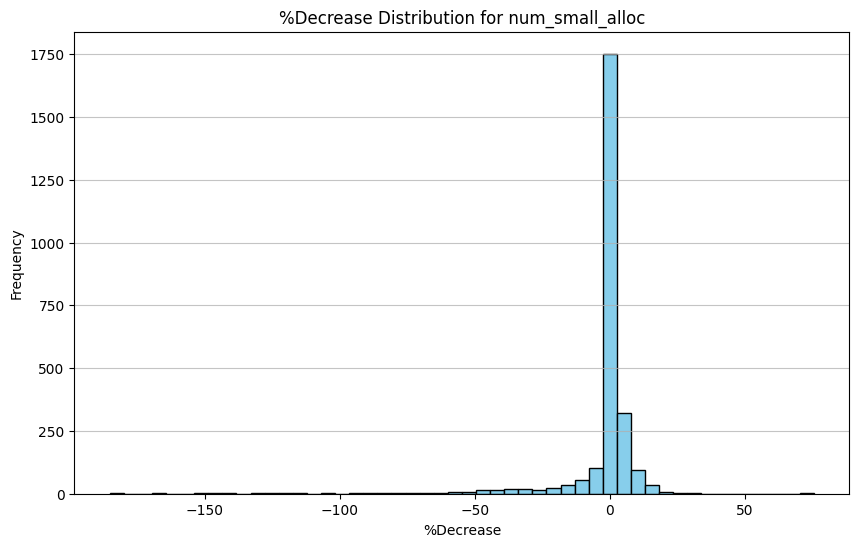

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,711,75.799574
1,NaN,NaN,NaN,147,29.282869
2,NaN,NaN,NaN,200,27.285130
3,NaN,NaN,NaN,132,26.190476
4,NaN,NaN,NaN,117,21.910112
...,...,...,...,...,...
2545,NaN,NaN,NaN,-227,-150.331126
2546,NaN,NaN,NaN,-253,-150.595238
2547,NaN,NaN,NaN,-193,-151.968504
2548,NaN,NaN,NaN,-250,-164.473684


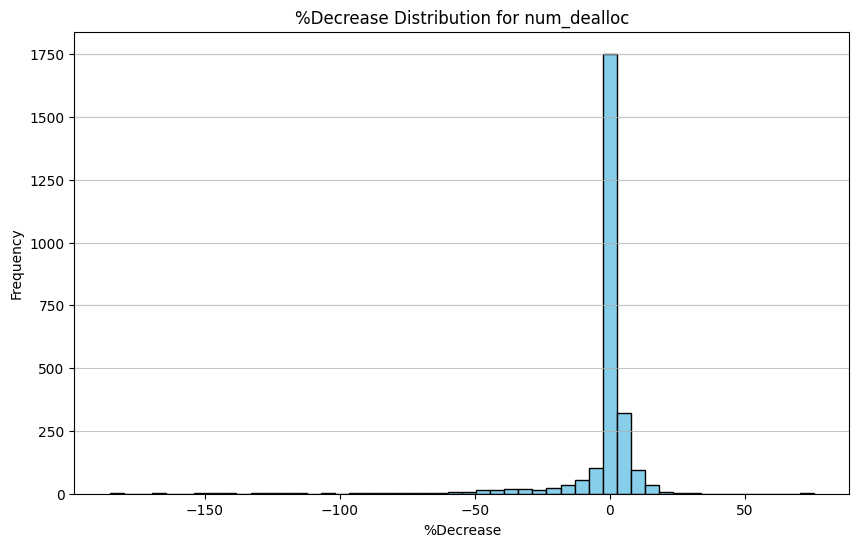

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,711,75.799574
1,NaN,NaN,NaN,147,29.282869
2,NaN,NaN,NaN,200,27.285130
3,NaN,NaN,NaN,132,26.190476
4,NaN,NaN,NaN,117,21.910112
...,...,...,...,...,...
2545,NaN,NaN,NaN,-227,-150.331126
2546,NaN,NaN,NaN,-253,-150.595238
2547,NaN,NaN,NaN,-193,-151.968504
2548,NaN,NaN,NaN,-250,-164.473684


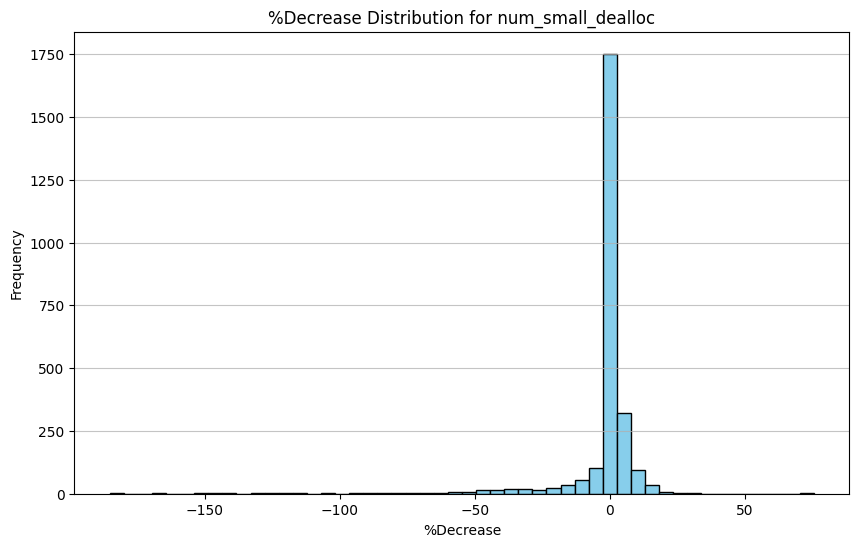

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,353579,353579,0,0.0
1,Lean/Elab/Tactic/Cache.lean,93540,93540,0,0.0
2,Lean/Elab/Tactic/Congr.lean,31379,31379,0,0.0
3,Lean/PrettyPrinter/Delaborator/Builtins.lean,1682933,1682933,0,0.0
4,Lean/Elab/Tactic/Repeat.lean,80060,80060,0,0.0
...,...,...,...,...,...
845,Lean/Parser/StrInterpolation.lean,16919,16919,0,0.0
846,Lean/Data/Lsp/Utf16.lean,18541,18541,0,0.0
847,Lean/CoreM.lean,494608,494608,0,0.0
848,Lean/LazyInitExtension.lean,10832,10832,0,0.0


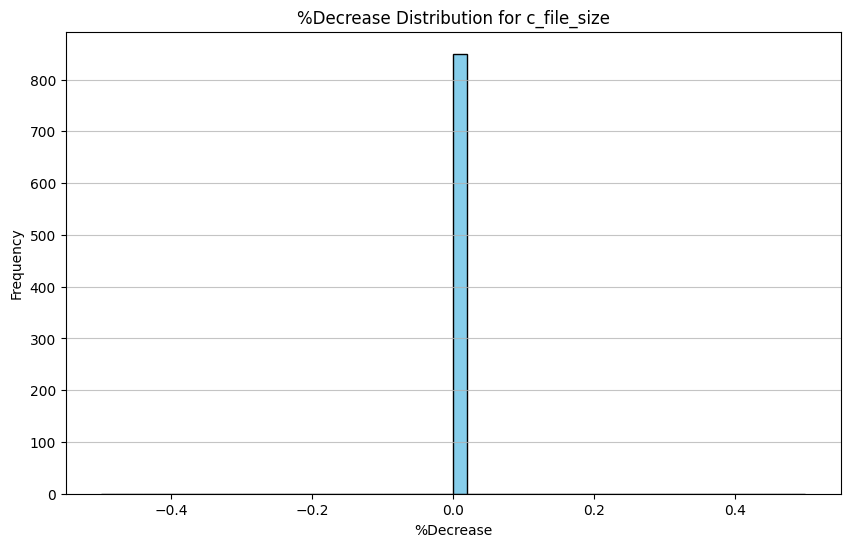

In [5]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16254,NaN
Lean/Elab/Do.lean,14354,NaN
Lean/PrettyPrinter/Delaborator/Builtins.lean,11419,NaN
Lean/Compiler/IR/EmitLLVM.lean,10858,NaN
Lean/Meta/Match/MatchEqs.lean,9897,NaN
...,...,...
Init/Data/Cast.lean,145,NaN
Init/Data/List.lean,144,NaN
Init/Dynamic.lean,142,NaN


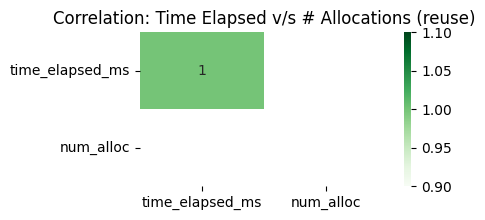

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16969,NaN
Lean/Elab/Do.lean,15573,NaN
Lean/PrettyPrinter/Delaborator/Builtins.lean,12305,NaN
Lean/Compiler/IR/EmitLLVM.lean,11165,NaN
Lean/Elab/App.lean,10333,NaN
...,...,...
Init/Data/Int/Bitwise.lean,129,NaN
Init/Data/ByteArray.lean,127,NaN
Init/Data/String.lean,122,NaN


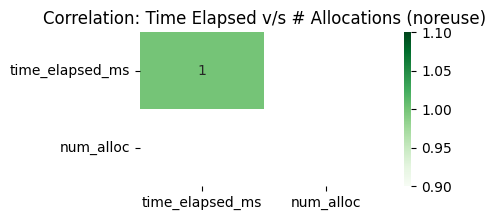

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16969,NaN
Lean/Elab/Tactic/Omega/Frontend.lean,16254,NaN
Lean/Elab/Do.lean,15573,NaN
Lean/Elab/Do.lean,14354,NaN
Lean/PrettyPrinter/Delaborator/Builtins.lean,12305,NaN
...,...,...
Init/Data/ByteArray.lean,127,NaN
Init/Data/String.lean,122,NaN
Init/Data/Char.lean,116,NaN


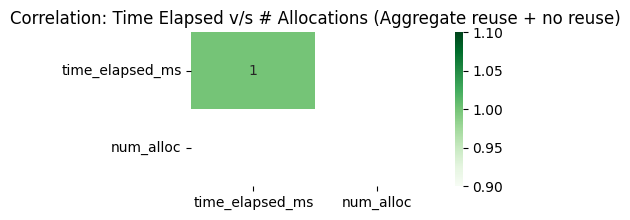

In [6]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: